In [126]:
## lo básico
import pandas as pd
import numpy as np

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## pre procesado
from sklearn.model_selection import train_test_split
#from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# 1. Carga de datos

In [127]:
url = "https://raw.githubusercontent.com/Valeriavinasl/ucm-tfm/main/data/Limpieza_Encuesta.csv"

df = pd.read_csv(url, encoding="utf-8-sig",sep=None, engine="python")
df.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,motivo,n_acompañantes,epoca,...,is_tr_mochila,is_reserva_aloj,alojamiento,hace_cuanto,is_volver_a_hacer,etapa_ideal,nota,is_lesion,consejos,modo_realizacion
0,32.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Deportivo, Cultural/turístico, Pers...",3.0,Verano,...,0,1,"Albergues privados, Hostales / Hoteles",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,"Sí, leve",Sin respuesta,A pie
1,32.0,Hombre,España,0,No,Avanzada (rutas largas con mochila/montaña),Media,"Deportivo, Cultural/turístico, Personal/reflexivo",3.0,Verano,...,0,1,"Albergues públicos, Albergues privados, Hostal...",Más de 2 años,Sí,Medias (~20 km con algo de desnivel),9,No,Hacer etapas parecidas en distancia y terreno ...,A pie
2,32.0,Hombre,España,0,No,Moderada (10–20 km regularmente),Media,"Religioso, Cultural/turístico",6.0,Primavera,...,1,1,Hostales / Hoteles,Más de 2 años,Sí,Medias (~20 km con algo de desnivel),8,"Sí, leve",Sin respuesta,A pie
3,32.0,Mujer,Colombia,0,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Personal/reflexivo,Desconocido,Primavera,...,1,1,"Albergues privados, Hostales / Hoteles",Este año,Sí,Medias (~20 km con algo de desnivel),9,No,Sin respuesta,A pie
4,21.0,Mujer,España,0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Cultural/turístico, Personal/reflexivo",6.0,Verano,...,1,1,Albergues privados,En los últimos 2 años,Sí,Medias (~20 km con algo de desnivel),10,"Sí, leve",Prefiero no revelar y que cada uno viva su cam...,A pie


# 2. Análisis exploratorio de los datos

## 2.1 Variables numéricas

In [128]:
v_numericas = ["edad", "dias", "distancia", "nota"]

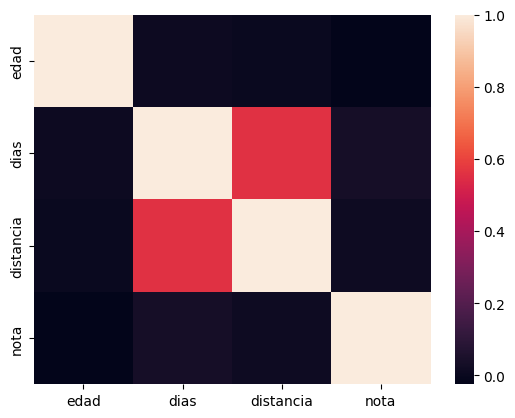

In [129]:
df_matriz = df[v_numericas]
matriz = df_matriz.corr()
sns.heatmap(matriz)
plt.show()

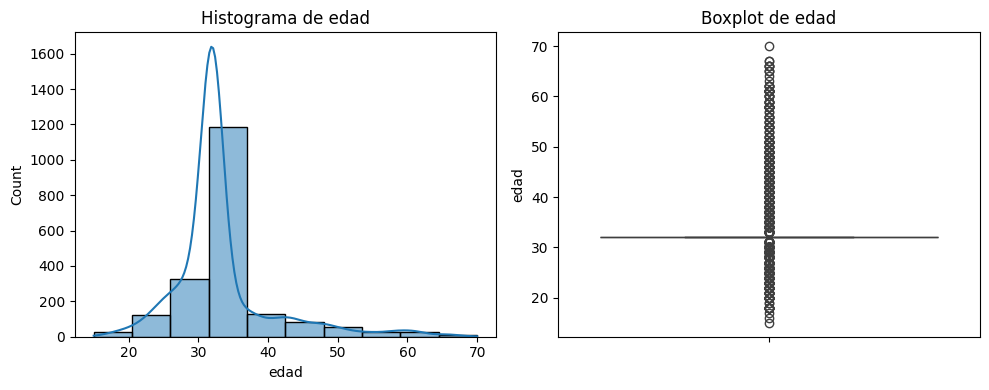

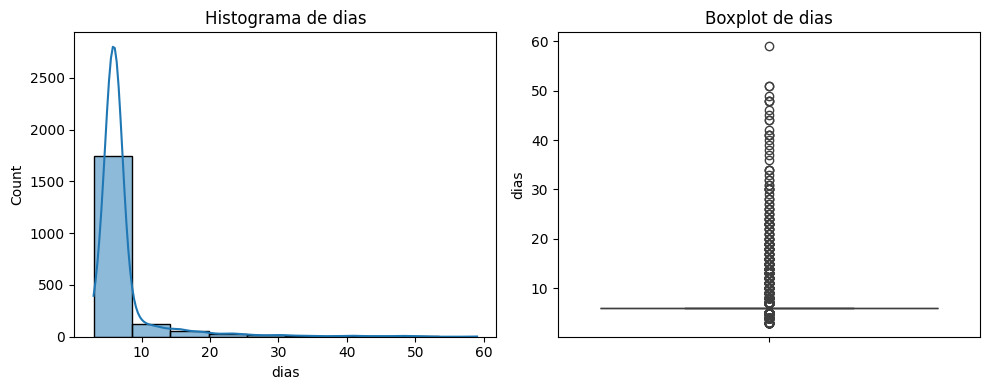

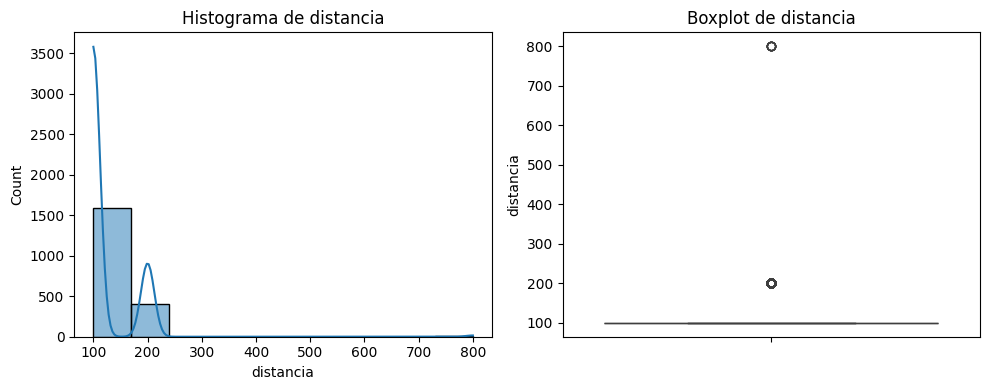

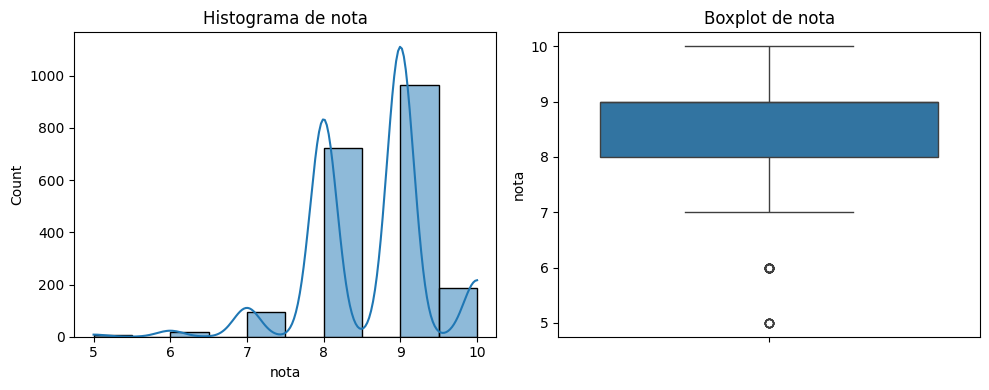

In [130]:
for col in v_numericas:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

for col in v_numericas:
    fig, axes = plt.subplots(1, 2, figsize = (10, 4))

    sns.histplot(df[col], bins = 10, kde=True, ax = axes[0])
    axes[0].set_title(f"Histograma de {col}")

    sns.boxplot(y = df[col], ax = axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

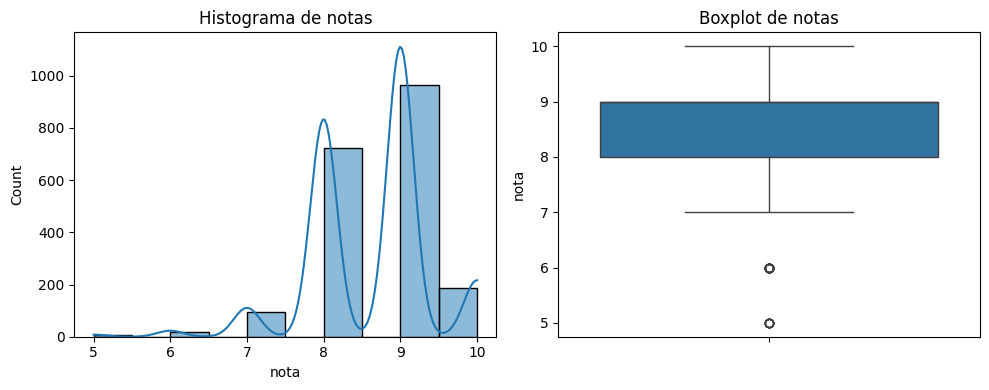

In [131]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df["nota"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histograma de notas")

sns.boxplot(y=df["nota"], ax=axes[1])
axes[1].set_title("Boxplot de notas")

plt.tight_layout()
plt.show()

## 2.2 Variables categóricas

In [132]:
v_categoricas = ["genero", "pais", "ruta", "epoca", "calzado", "modo_realizacion", "alojamiento", "is_volver_a_hacer", "is_lesion"]

/tmp/ipython-input-3701287528.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="genero", data=df, palette="Set2", order=orden)


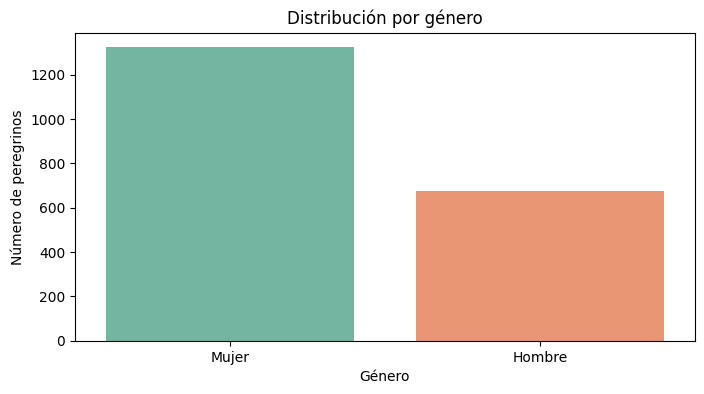

In [133]:
plt.figure(figsize = (8,4))
orden=df["genero"].value_counts().index
sns.countplot(x="genero", data=df, palette="Set2", order=orden)
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-1719571199.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pais", data=df_top, order=top_paises, palette="Set2")


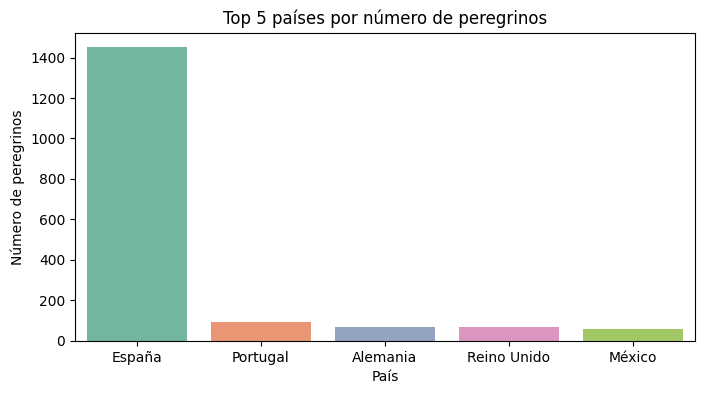

In [134]:
top_paises = df["pais"].value_counts().nlargest(5).index
df_top = df[df["pais"].isin(top_paises)]

plt.figure(figsize=(8,4))
sns.countplot(x="pais", data=df_top, order=top_paises, palette="Set2")
plt.title("Top 5 países por número de peregrinos")
plt.xlabel("País")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-986337959.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ruta", data=df, palette="Set2", order=orden)


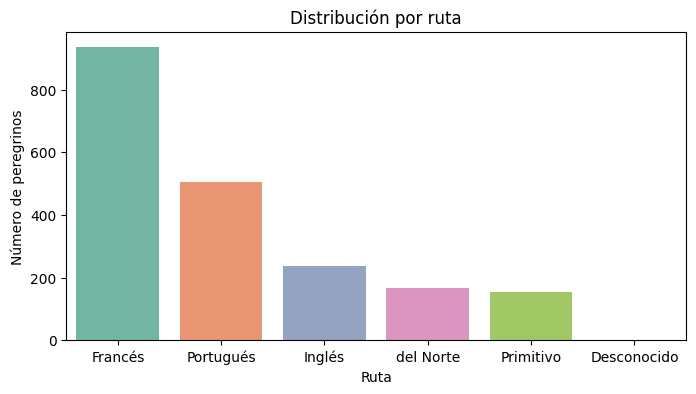

In [135]:
plt.figure(figsize=(8,4))
orden=df["ruta"].value_counts().index
sns.countplot(x="ruta", data=df, palette="Set2", order=orden)
plt.title("Distribución por ruta")
plt.xlabel("Ruta")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-2251333911.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="inicio", data=df, palette="Set2", order=orden)


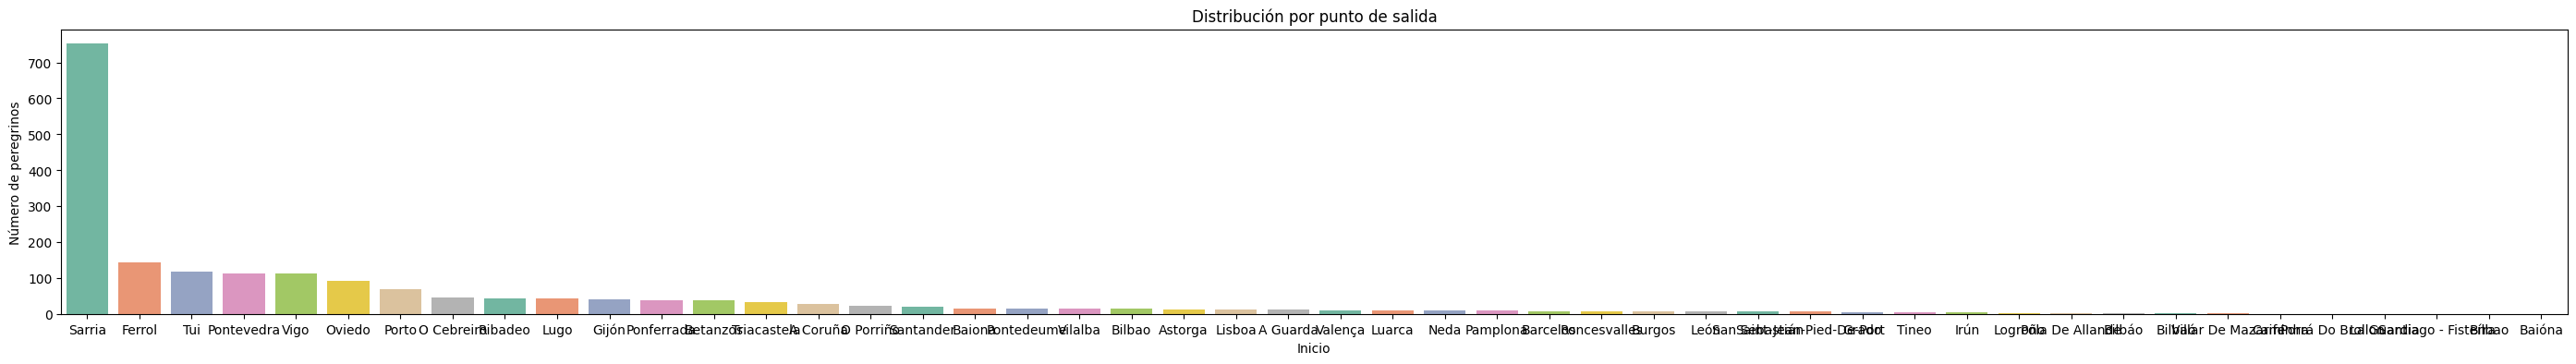

In [136]:
plt.figure(figsize=(35,4))
orden = df["inicio"].value_counts().index
sns.countplot(x="inicio", data=df, palette="Set2", order=orden)
plt.title("Distribución por punto de salida")
plt.xlabel("Inicio")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-3169799565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="modo_realizacion", data=df, palette="Set2", order=orden)


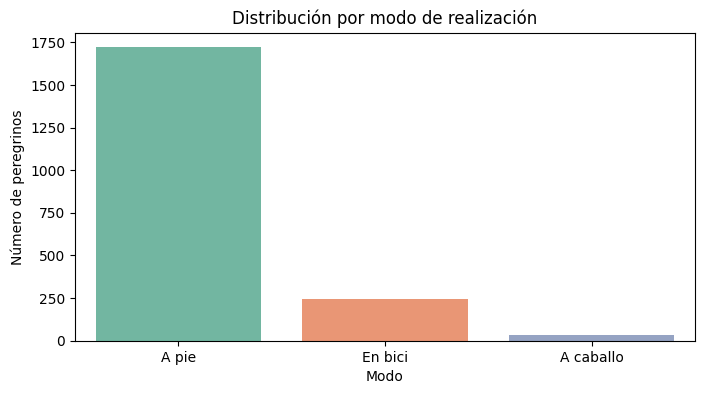

In [137]:
plt.figure(figsize=(8,4))
orden = df["modo_realizacion"].value_counts().index
sns.countplot(x="modo_realizacion", data=df, palette="Set2", order=orden)
plt.title("Distribución por modo de realización")
plt.xlabel("Modo")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-552900967.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="calzado", data=df, palette="Set2", order=orden)


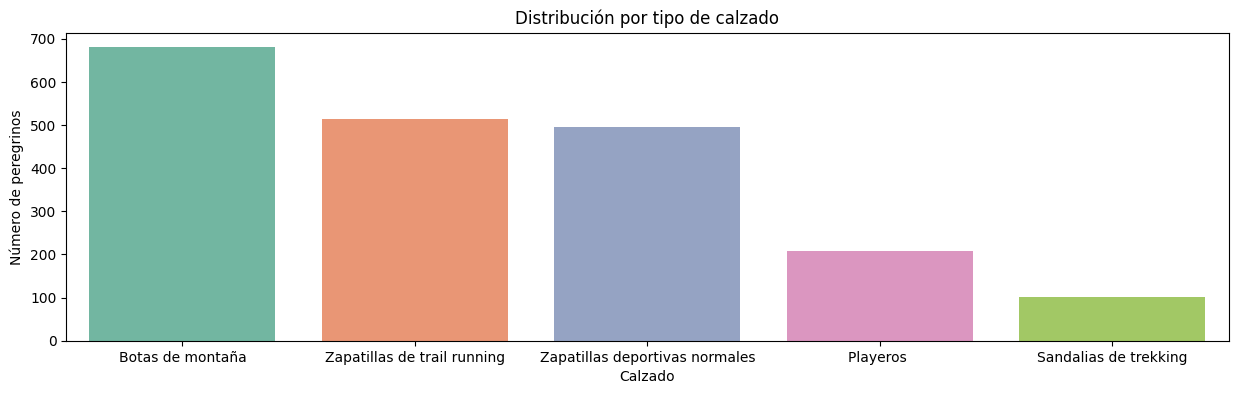

In [138]:
plt.figure(figsize=(15,4))
orden = df["calzado"].value_counts().index
sns.countplot(x="calzado", data=df, palette="Set2", order=orden)
plt.title("Distribución por tipo de calzado")
plt.xlabel("Calzado")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-586291933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="alojamiento", data=df, palette="Set2", order=orden)


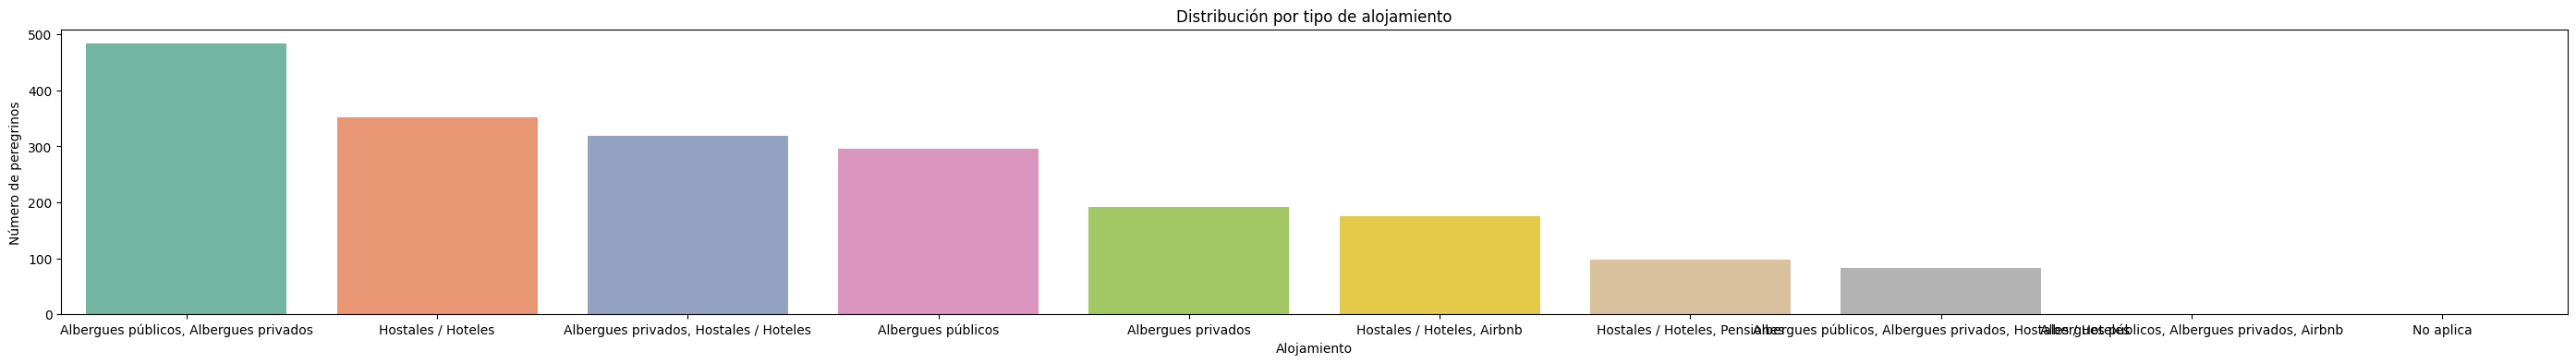

In [139]:
plt.figure(figsize=(35,4))
orden = df["alojamiento"].value_counts().index
sns.countplot(x="alojamiento", data=df, palette="Set2", order=orden)
plt.title("Distribución por tipo de alojamiento")
plt.xlabel("Alojamiento")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-736434584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_volver_a_hacer", data=df, palette="Set2", order=orden)


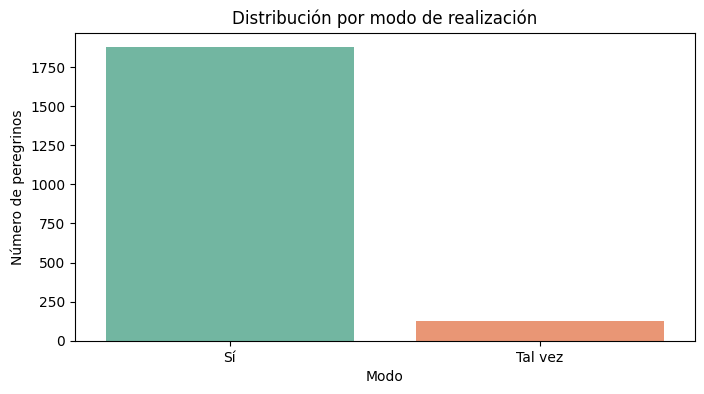

In [140]:
plt.figure(figsize=(8,4))
orden = df["is_volver_a_hacer"].value_counts().index
sns.countplot(x="is_volver_a_hacer", data=df, palette="Set2", order=orden)
plt.title("Distribución por modo de realización")
plt.xlabel("Modo")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-348159963.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="is_lesion", data=df, palette="Set2", order=orden)


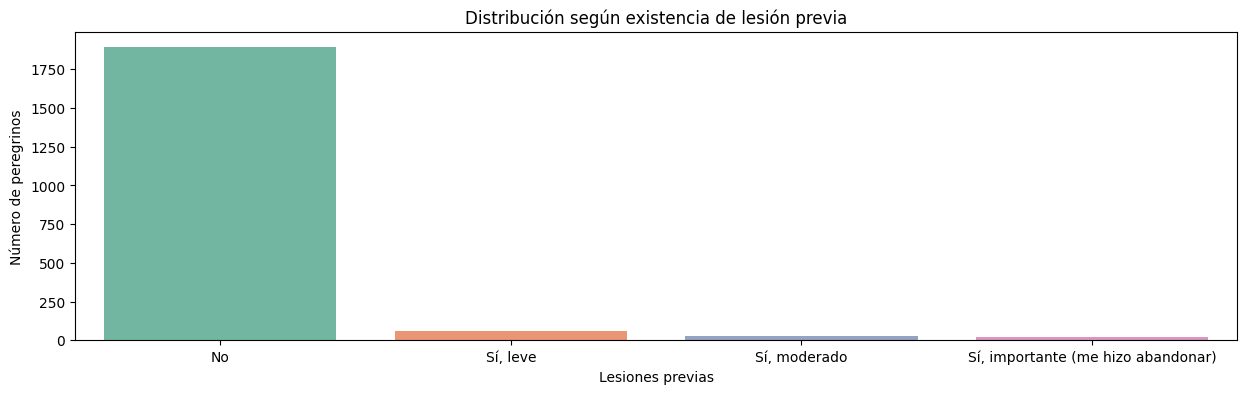

In [141]:
plt.figure(figsize=(15,4))
orden = df["is_lesion"].value_counts().index
sns.countplot(x="is_lesion", data=df, palette="Set2", order=orden)
plt.title("Distribución según existencia de lesión previa")
plt.xlabel("Lesiones previas")
plt.ylabel("Número de peregrinos")
plt.show()

## 2.3 Variables binarias

In [142]:
v_binarias = ["is_condicion_fisica", "is_calzado_adecuado", "is_tr_mochila", "is_reserva_aloj", "is_camino_realizado_prev"]

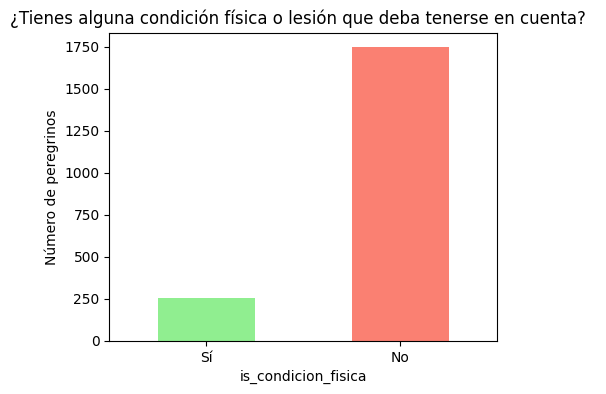

In [143]:
col = "is_condicion_fisica"
vc = df[col].value_counts().reindex([1,0])

plt.figure(figsize=(5,4))
vc.plot(kind="bar", color=["lightgreen","salmon"])
plt.title("¿Tienes alguna condición física o lesión que deba tenerse en cuenta?  ")
plt.xticks([0,1], ["Sí", "No"], rotation=0)
plt.ylabel("Número de peregrinos")
plt.show()

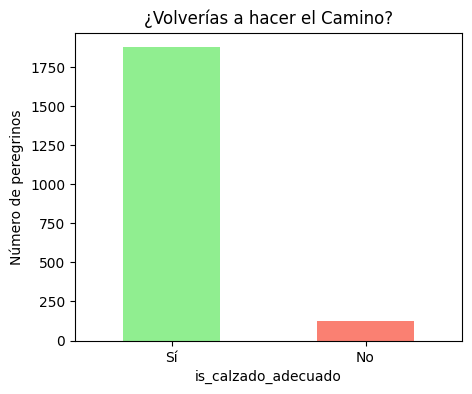

In [144]:
col = "is_calzado_adecuado"
vc = df[col].value_counts().reindex([1,0])

plt.figure(figsize=(5,4))
vc.plot(kind="bar", color=["lightgreen","salmon"])
plt.title("¿Volverías a hacer el Camino?")
plt.xticks([0,1], ["Sí", "No"], rotation=0)
plt.ylabel("Número de peregrinos")
plt.show()

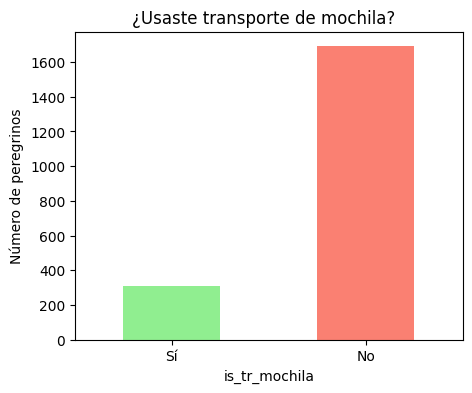

In [145]:
col = "is_tr_mochila"
vc = df[col].value_counts().reindex([1,0])

plt.figure(figsize=(5,4))
vc.plot(kind="bar", color=["lightgreen","salmon"])
plt.title("¿Usaste transporte de mochila?  ")
plt.xticks([0,1], ["Sí", "No"], rotation=0)
plt.ylabel("Número de peregrinos")
plt.show()

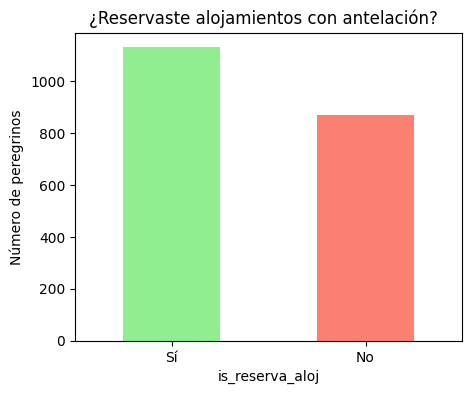

In [146]:
col = "is_reserva_aloj"
vc = df[col].value_counts().reindex([1,0])

plt.figure(figsize=(5,4))
vc.plot(kind="bar", color=["lightgreen","salmon"])
plt.title("¿Reservaste alojamientos con antelación?  ")
plt.xticks([0,1], ["Sí", "No"], rotation=0)
plt.ylabel("Número de peregrinos")
plt.show()

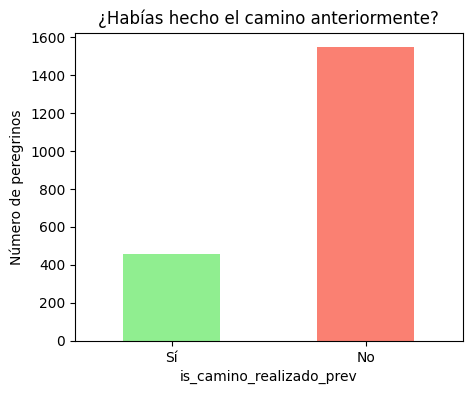

In [147]:
col = "is_camino_realizado_prev"
vc = df[col].value_counts().reindex([1,0])

plt.figure(figsize=(5,4))
vc.plot(kind="bar", color=["lightgreen","salmon"])
plt.title("¿Habías hecho el camino anteriormente?")
plt.xticks([0,1], ["Sí", "No"], rotation=0)
plt.ylabel("Número de peregrinos")
plt.show()

## 3. Relación entre variables



## 3.1 Variables numéricas entre sí

<Axes: >

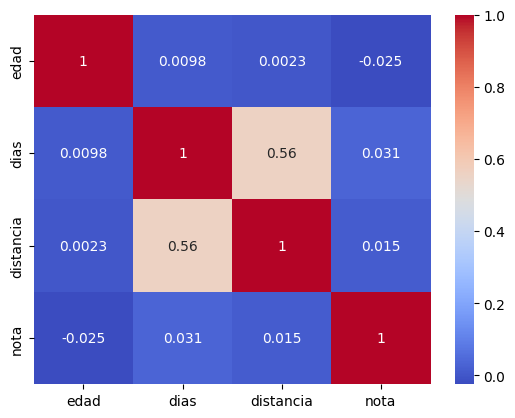

In [148]:
# Correlación de Pearson
corr = df[["edad","dias","distancia","nota"]].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")

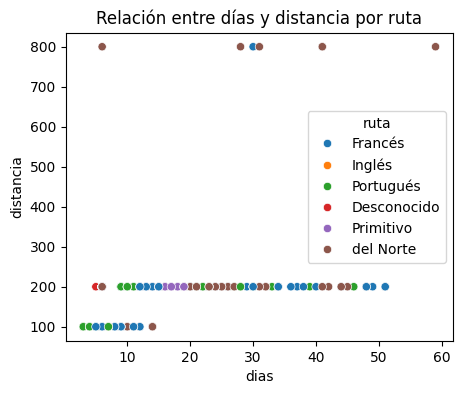

In [149]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x="dias", y="distancia", hue="ruta")
plt.title("Relación entre días y distancia por ruta")
plt.show()

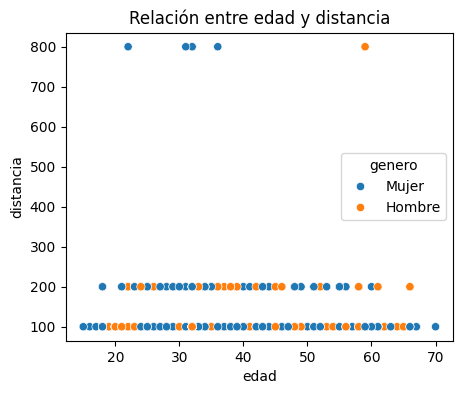

In [150]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x="edad", y="distancia", hue="genero")
plt.title("Relación entre edad y distancia")
plt.show()

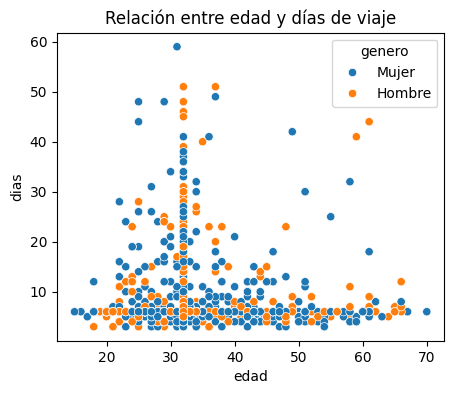

In [151]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x="edad", y="dias", hue="genero")
plt.title("Relación entre edad y días de viaje")
plt.show()

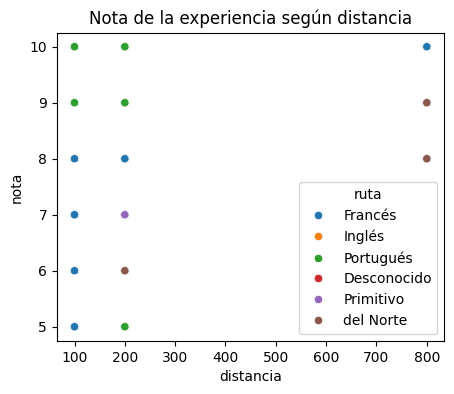

In [152]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x="distancia", y="nota", hue="ruta")
plt.title("Nota de la experiencia según distancia")
plt.show()

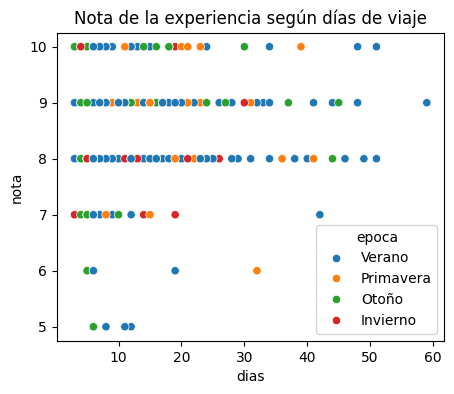

In [153]:
plt.figure(figsize=(5,4))
sns.scatterplot(data=df, x="dias", y="nota", hue="epoca")
plt.title("Nota de la experiencia según días de viaje")
plt.show()

## 3.2 Variables categóricas vs binarias

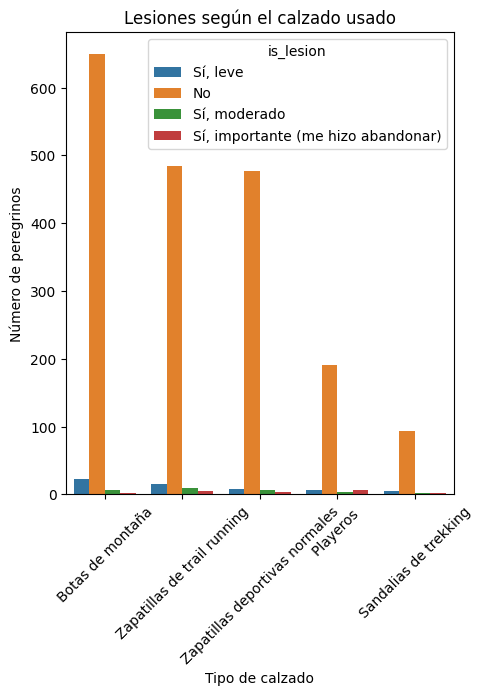

In [154]:
plt.figure(figsize=(5,6))
orden = df["calzado"].value_counts().index
sns.countplot(x="calzado", hue="is_lesion", data=df, order=orden)
plt.title("Lesiones según el calzado usado")
plt.xlabel("Tipo de calzado")
plt.ylabel("Número de peregrinos")
plt.xticks(rotation=45)
plt.show()

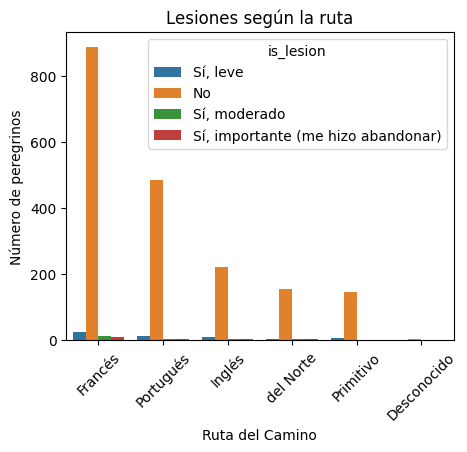

In [155]:
plt.figure(figsize=(5,4))
orden = df["ruta"].value_counts().index
sns.countplot(x="ruta", hue="is_lesion", data=df, order=orden)
plt.title("Lesiones según la ruta")
plt.xlabel("Ruta del Camino")
plt.ylabel("Número de peregrinos")
plt.xticks(rotation=45)
plt.show()

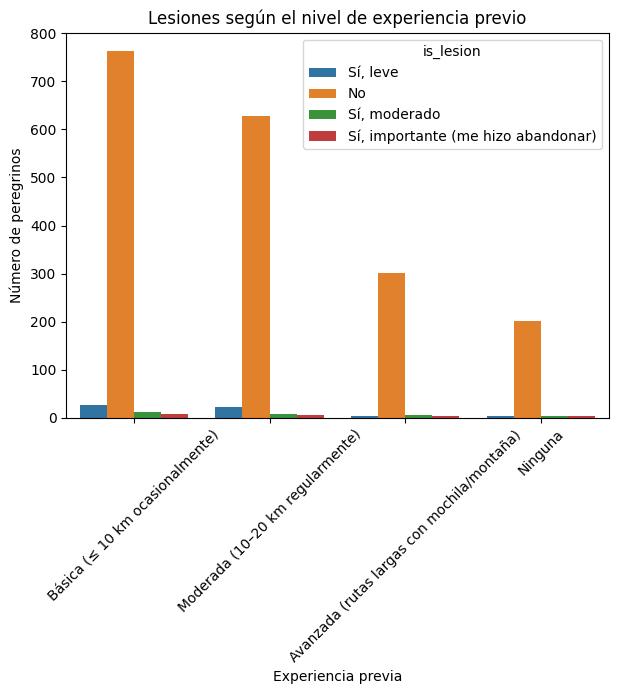

In [156]:
plt.figure(figsize=(7,5))
orden = df["nivel_expereincia_previo"].value_counts().index
sns.countplot(x="nivel_expereincia_previo", hue="is_lesion", data=df, order=orden)
plt.title("Lesiones según el nivel de experiencia previo")
plt.xlabel("Experiencia previa")
plt.ylabel("Número de peregrinos")
plt.xticks(rotation=45)
plt.show()

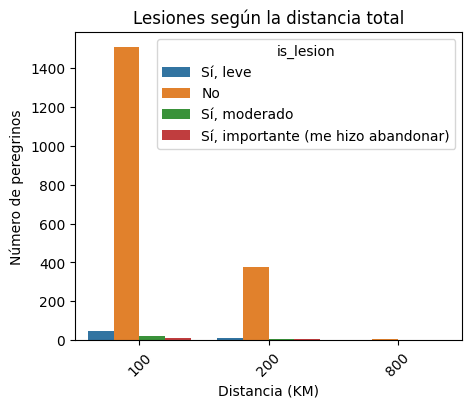

In [157]:
plt.figure(figsize=(5,4))
orden = df["distancia"].value_counts().index
sns.countplot(x="distancia", hue="is_lesion", data=df, order=orden)
plt.title("Lesiones según la distancia total")
plt.xlabel("Distancia (KM)")
plt.ylabel("Número de peregrinos")
plt.xticks(rotation=45)
plt.show()

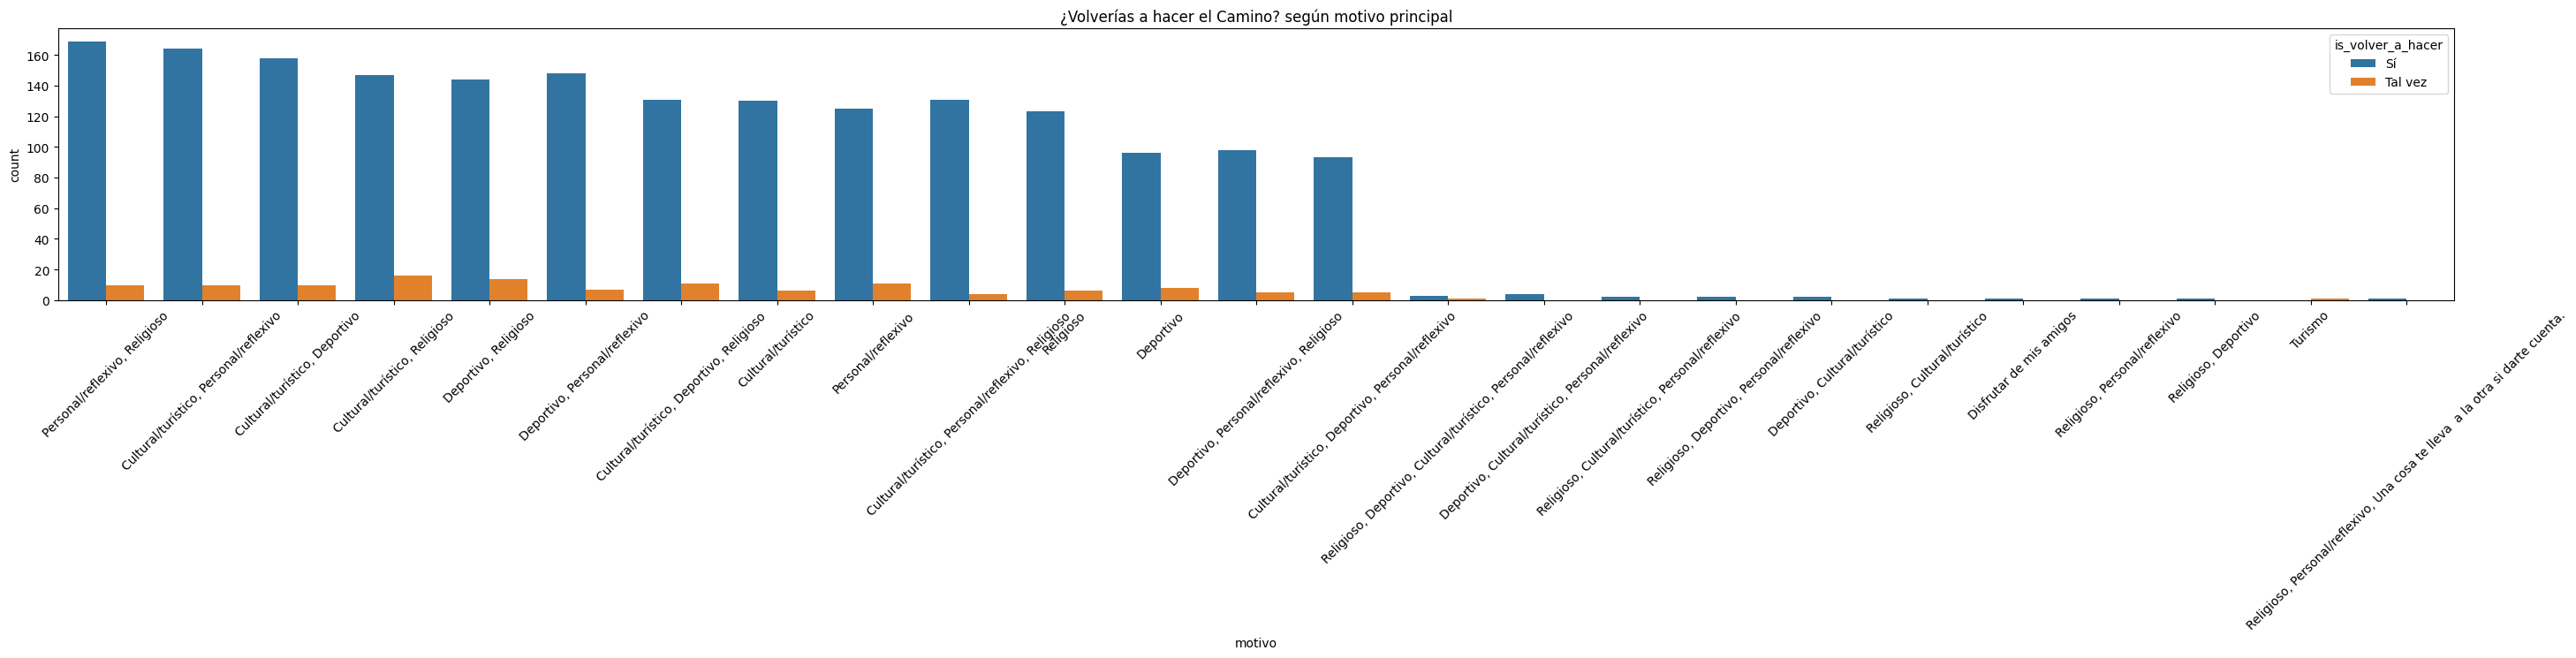

In [158]:
plt.figure(figsize=(35,4))
orden = df["motivo"].value_counts().index
sns.countplot(x="motivo", hue="is_volver_a_hacer", data=df, order=orden)
plt.title("¿Volverías a hacer el Camino? según motivo principal")
plt.xticks(rotation=45)
plt.show()

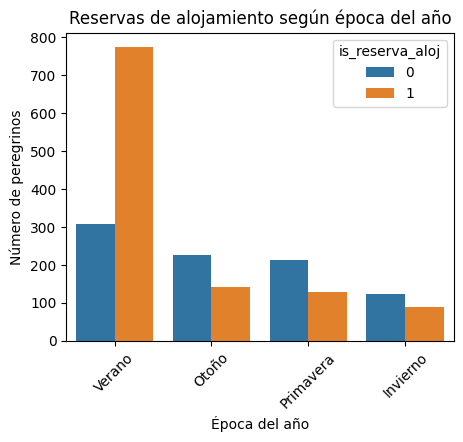

In [159]:
plt.figure(figsize=(5,4))
orden = df["epoca"].value_counts().index
sns.countplot(x="epoca", hue="is_reserva_aloj", data=df, order=orden)
plt.title("Reservas de alojamiento según época del año")
plt.xlabel("Época del año")
plt.ylabel("Número de peregrinos")
plt.xticks(rotation=45)
plt.show()

## 3.3 Variables categóricas vs numéricas

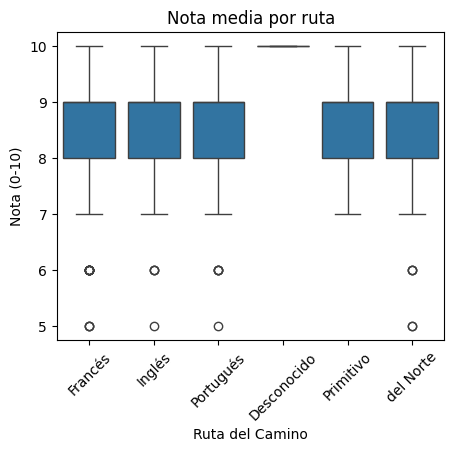

In [160]:
plt.figure(figsize=(5,4))
sns.boxplot(x="ruta", y="nota", data=df)
plt.title("Nota media por ruta")
plt.xlabel("Ruta del Camino")
plt.ylabel("Nota (0-10)")
plt.xticks(rotation=45)
plt.show()

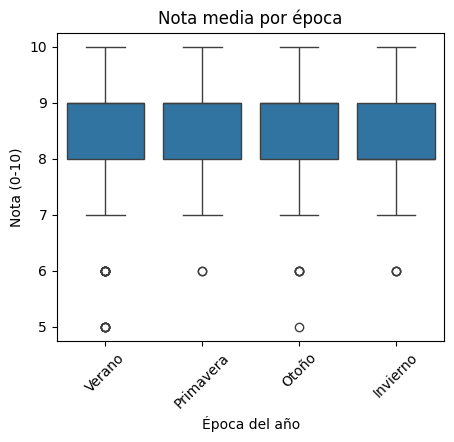

In [161]:
plt.figure(figsize=(5,4))
sns.boxplot(x="epoca", y="nota", data=df)
plt.title("Nota media por época")
plt.xlabel("Época del año")
plt.ylabel("Nota (0-10)")
plt.xticks(rotation=45)
plt.show()

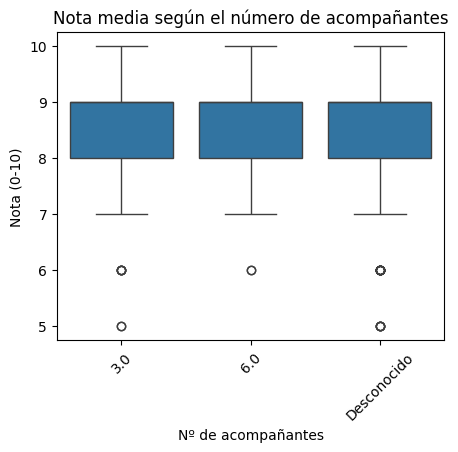

In [162]:
plt.figure(figsize=(5,4))
sns.boxplot(x="n_acompañantes", y="nota", data=df)
plt.title("Nota media según el número de acompañantes")
plt.xlabel("Nº de acompañantes")
plt.ylabel("Nota (0-10)")
plt.xticks(rotation=45)
plt.show()

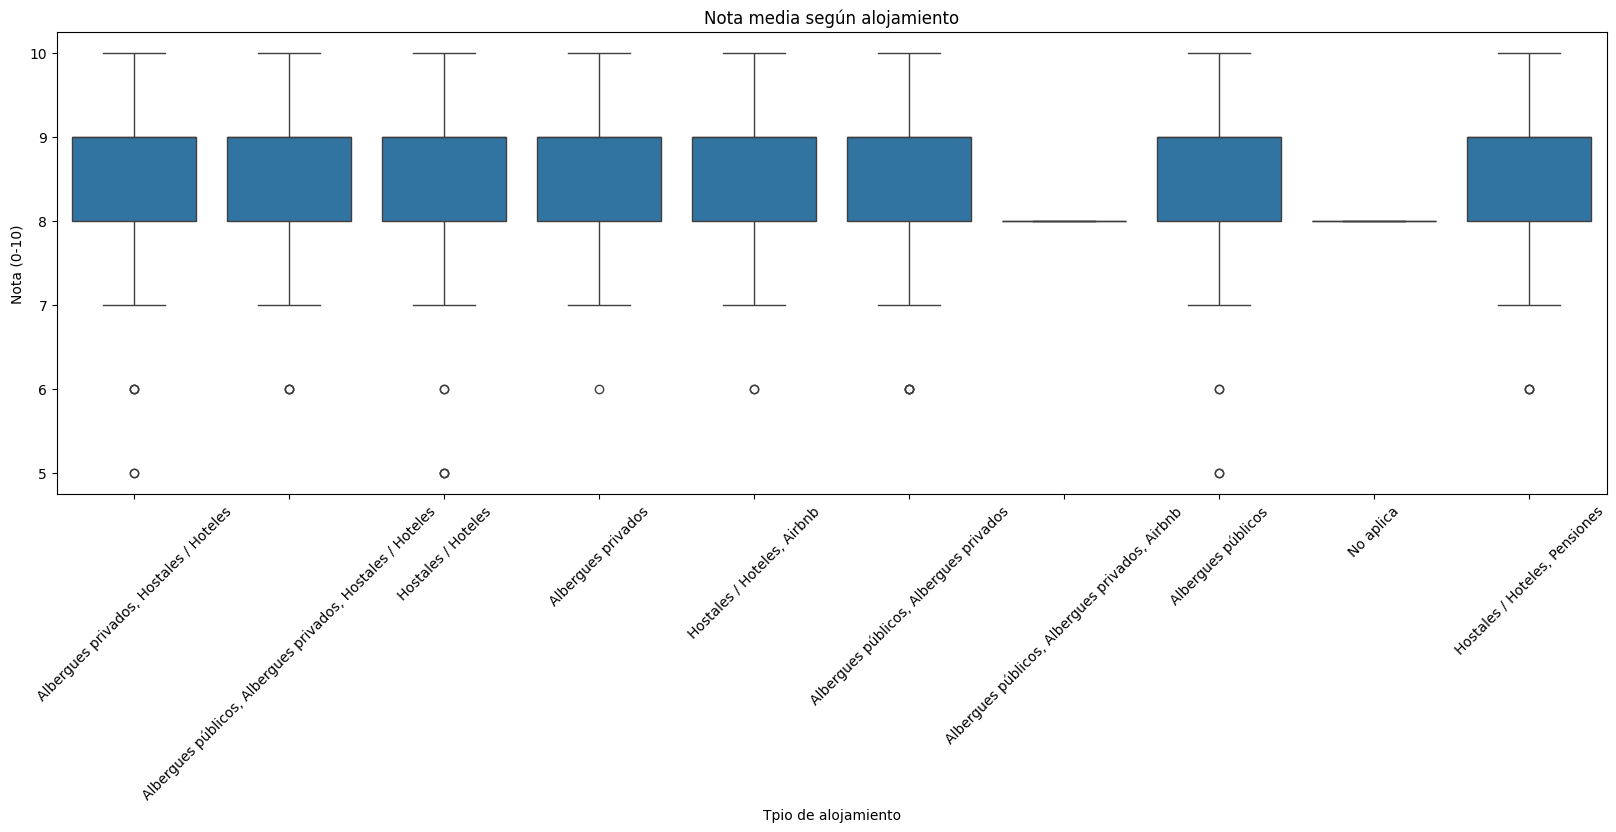

In [163]:
plt.figure(figsize=(20,6))
sns.boxplot(x="alojamiento", y="nota", data=df)
plt.title("Nota media según alojamiento")
plt.xlabel("Tpio de alojamiento")
plt.ylabel("Nota (0-10)")
plt.xticks(rotation=45)
plt.show()

# 4. Análisis multivariado

Se muestran los porcentajes para cada tabla

In [164]:
pd.crosstab(df["ruta"], df["is_reserva_aloj"], normalize="index") * 100

is_reserva_aloj,0,1
ruta,,
Desconocido,0.000000,100.000000
Francés,39.957265,60.042735
Inglés,52.118644,47.881356
Portugués,38.492063,61.507937
Primitivo,54.193548,45.806452
del Norte,56.287425,43.712575


In [165]:
# % para cada tipo de lesión en cada ruta del camino.
pd.crosstab(df["ruta"], df["is_lesion"], normalize="index") * 100

is_lesion,No,"Sí, importante (me hizo abandonar)","Sí, leve","Sí, moderado"
ruta,,,,
Desconocido,100.000000,0.000000,0.000000,0.000000
Francés,94.764957,1.068376,2.670940,1.495726
Inglés,93.220339,0.847458,4.237288,1.694915
Portugués,95.833333,0.595238,2.777778,0.793651
Primitivo,94.838710,0.645161,3.870968,0.645161
del Norte,93.413174,1.796407,1.796407,2.994012


In [166]:
# % que reservaron alojamiento para cada época del año.
pd.crosstab(df["epoca"], df["is_reserva_aloj"], normalize="index") * 100

is_reserva_aloj,0,1
epoca,,
Invierno,58.018868,41.981132
Otoño,61.475410,38.524590
Primavera,62.647059,37.352941
Verano,28.465804,71.534196


In [167]:
# % que volverían a hacer el camino para cada motivo.
pd.crosstab(df["motivo"], df["is_volver_a_hacer"], normalize="index") * 100

is_volver_a_hacer,Sí,Tal vez
motivo,,
Cultural/turístico,95.588235,4.411765
"Cultural/turístico, Deportivo",94.047619,5.952381
"Cultural/turístico, Deportivo, Personal/reflexivo",94.897959,5.102041
"Cultural/turístico, Deportivo, Religioso",92.253521,7.746479
"Cultural/turístico, Personal/reflexivo",94.252874,5.747126
"Cultural/turístico, Personal/reflexivo, Religioso",97.037037,2.962963
"Cultural/turístico, Religioso",90.184049,9.815951
Deportivo,92.307692,7.692308
"Deportivo, Cultural/turístico",100.000000,0.000000


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      2000 non-null   float64
 1   genero                    2000 non-null   object 
 2   pais                      2000 non-null   object 
 3   is_condicion_fisica       2000 non-null   int64  
 4   detalle_condicion         2000 non-null   object 
 5   nivel_expereincia_previo  2000 non-null   object 
 6   condicion_previa          2000 non-null   object 
 7   motivo                    2000 non-null   object 
 8   n_acompañantes            2000 non-null   object 
 9   epoca                     2000 non-null   object 
 10  is_camino_realizado_prev  2000 non-null   int64  
 11  ruta                      2000 non-null   object 
 12  dias                      2000 non-null   float64
 13  inicio                    2000 non-null   object 
 14  distanci

In [173]:
# % que usaron transporte de mochila para cada grupo de edad.
pd.crosstab(df["edad"], df["is_tr_mochila"], normalize="index") * 100

is_tr_mochila,0,1
edad,,
15.0,0.000000,100.000000
16.0,0.000000,100.000000
17.0,0.000000,100.000000
18.0,100.000000,0.000000
19.0,100.000000,0.000000
20.0,84.615385,15.384615
21.0,88.888889,11.111111
22.0,82.352941,17.647059
23.0,77.272727,22.727273


In [174]:
# % de calzado adecuado para cada ruta.
pd.crosstab(df["ruta"], df["is_calzado_adecuado"], normalize="index") * 100

is_calzado_adecuado,0,1
ruta,,
Desconocido,0.000000,100.000000
Francés,5.876068,94.123932
Inglés,5.932203,94.067797
Portugués,6.746032,93.253968
Primitivo,6.451613,93.548387
del Norte,7.185629,92.814371
